In [1]:
import tensorflow as tf
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
#Utility functions

def show_images(images):
    n = int(np.ceil(np.sqrt(len(images))))
    fig = plt.figure(figsize=(n, n))
    gs = gridspec.GridSpec(n, n)
    gs.update(wspace=0.05, hspace=0.05)

    for i, img in enumerate(images):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(img)
        
def read_img_patches(path,name):
    patches = []
    for i in range(764):
        img = Image.open(path+'normal_patches/'+name+'-'+str(i)+'.png')
        patches.append(np.array(img))
    return patches

In [3]:
#Global
path = '../../work/slides/ICIAR2018_BACH_Challenge/Photos/Normal/'

In [4]:
#Read patches from one image
name = 'n034'
patches = read_img_patches(path,name)
len(patches)

764

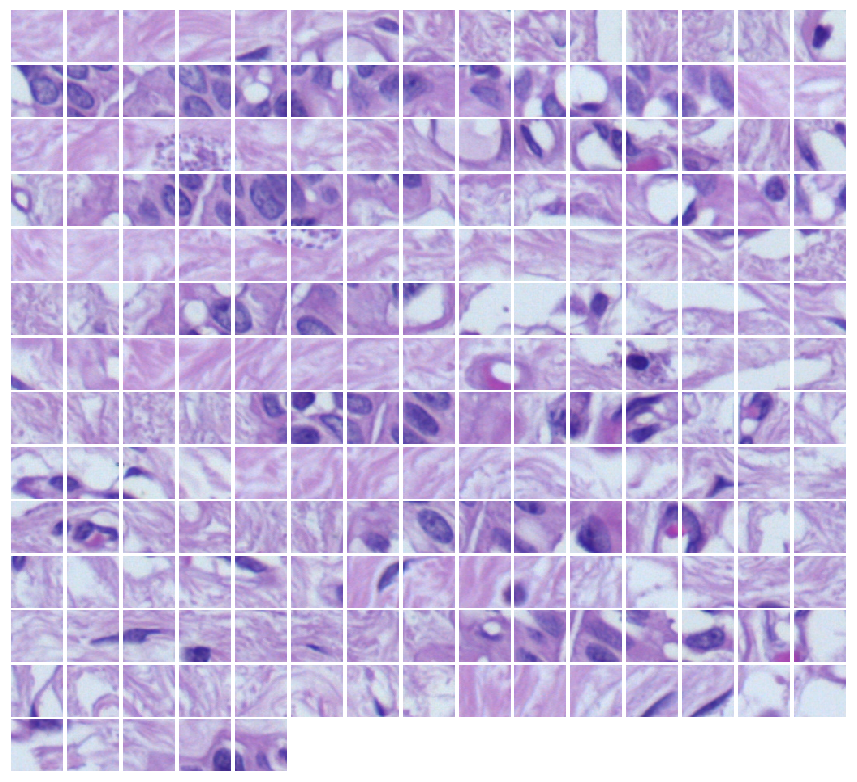

In [5]:
show_images(patches[100:300])

In [6]:
#Read samples!
from PIL import Image
from os import listdir
from os.path import isfile, join
samples_path = '../../work/slides/dcgan-completion.tensorflow/samples/'
samples_names = [f for f in listdir(samples_path) if isfile(join(samples_path, f))]
samples_names.sort()

In [7]:
samples = []
for name in samples_names:
    img = Image.open(samples_path+name)
    samples.append(np.array(img))
print(len(samples))

119


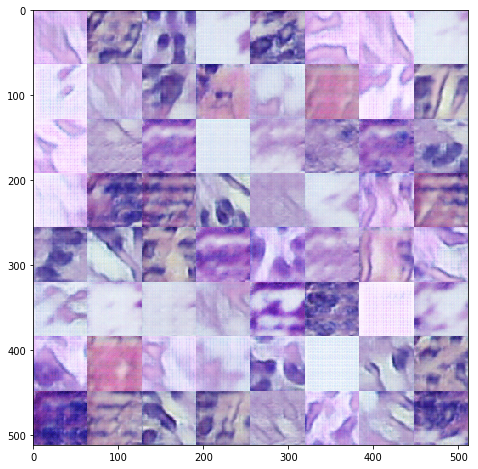

In [8]:
plt.imshow(samples[-1])

In [12]:
#make gif
def make_gif(images, fname, duration=15, true_image=True):
  import moviepy.editor as mpy

  def make_frame(t):
    try:
      x = images[int(len(images)/duration*t)]
    except:
      x = images[-1]

    if true_image:
      return x.astype(np.uint8)
    else:
      return ((x+1)/2*255).astype(np.uint8)

  clip = mpy.VideoClip(make_frame, duration=duration)
  clip.write_gif(fname, fps = len(images) / duration)

In [13]:
make_gif(samples, samples_path+'gifs/gif_15_epoch1.gif')


[MoviePy] Building file ../../work/slides/dcgan-completion.tensorflow/samples/gifs/gif_15_epoch1.gif with imageio


 99%|█████████▉| 105/106 [00:26<00:00,  4.11it/s]


In [16]:
from IPython.display import Image
from IPython.display import display
#display(Image(url=samples_path+'gifs/gif_15_epoch1.gif'))